This notebook aims to introduce how to run ITEMO

In [10]:
from invTrEMO import invTrEMO

First, let us define the target problem. In this notebook, we employ mDTLZ2-(1,0) as the example

In [11]:
import dtlz
test_problem = dtlz.DTLZ2(obj_num=3,n_var=8)

Then, generate the source dataset. The user could generate any source dataset by using "creat_source_data.py". Here, we directly use a predefined dataset.

In [12]:
import pickle

source_data = pickle.load(open("source_data_dtlz2_hs.p", "rb"))

After the preparion, we can run ITEMO

In [13]:
import numpy as np

Pop = np.random.rand(20,test_problem.dim)
inv_tgps, recorded_IGD, target_data = invTrEMO(test_problem,source_data,init_pop=Pop)

invTrEMO IGD: 0.4828591457455559
invTrEMO IGD: 0.47998237490080936
invTrEMO IGD: 0.46691557157821106
invTrEMO IGD: 0.4298728676416778
invTrEMO IGD: 0.40390306156711575
invTrEMO IGD: 0.3949843663051911
invTrEMO IGD: 0.3701611745519288
invTrEMO IGD: 0.3699161342894426
invTrEMO IGD: 0.32415897768357893
invTrEMO IGD: 0.29934859309424894
invTrEMO IGD: 0.2743626359592569
invTrEMO IGD: 0.27320263046035026
invTrEMO IGD: 0.2639073590801971
invTrEMO IGD: 0.2639073590801971
invTrEMO IGD: 0.2554512733804288
invTrEMO IGD: 0.25421480482267633
invTrEMO IGD: 0.24954442331295654
invTrEMO IGD: 0.24067560628572646
invTrEMO IGD: 0.2401690021055595
invTrEMO IGD: 0.24005750403298276
invTrEMO IGD: 0.23978585970726335
invTrEMO IGD: 0.2364269280361298
invTrEMO IGD: 0.2364269280361298
invTrEMO IGD: 0.23435617017263038
invTrEMO IGD: 0.234183902051583
invTrEMO IGD: 0.23136229426675428
invTrEMO IGD: 0.2313532955571336
invTrEMO IGD: 0.22980080984599544
invTrEMO IGD: 0.2201716651876047
invTrEMO IGD: 0.22017166518760

Let us test the performance of ITEMO. Firstly, we sample a set of points from the Pareto Front. For mDTLZ2-(1,0), the points are sampled as follows.

In [14]:
from Utils import generate_w

w_sample = generate_w(test_problem.obj_num,2000)
y_true = w_sample / np.sqrt(np.sum(w_sample**2,axis=1)).reshape(-1,1)

Then, the RMSE can be calculated by calculating the error between the predicted mean of the inverse TGPs and the true data.

In [15]:
x_sample, _ = inv_tgps.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE = np.sqrt(np.mean((y_pred - y_true)**2))
print("invTrEMO RMSE Result:"+str(RMSE))

invTrEMO RMSE Result:0.019851450740226394


Next, we compare it with ParEGO. After ParEGO find a set of nondominated solutions, inverse GP models are build. The result is recorded as ParEGO. Moreover, we also build inverse TGP models based on source data and the nondominated solutions obtained ParEGO, the result is recorded as ParEGO-HS

In [16]:
from ParEGO_UCB import ParEGO_UCB

inv_tgps_parego, Recorded_ParEGO_IGD, target_data_parego = ParEGO_UCB(test_problem,source_data,init_pop=Pop)
x_sample, _ = inv_tgps_parego.predict_gp(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (No Transfer):"+str(RMSE_parego))

x_sample, _ = inv_tgps_parego.predict(w_sample)
x_sample = (x_sample >= test_problem.standard_bounds[0:1,:])*x_sample + (x_sample < test_problem.standard_bounds[0:1,:])*test_problem.standard_bounds[0:1,:]
x_sample = (x_sample <= test_problem.standard_bounds[1:2,:])*x_sample + (x_sample > test_problem.standard_bounds[1:2,:])*test_problem.standard_bounds[1:2,:]
y_pred = test_problem(x_sample)
RMSE_parego = np.sqrt(np.mean((y_pred - y_true)**2))
print("ParEGO-UCB RMSE Result (Transfer):"+str(RMSE_parego))

ParEGO IGD: 0.4828591457455559
ParEGO IGD: 0.4378828613469894
ParEGO IGD: 0.3834513960848409
ParEGO IGD: 0.3834513960848409
ParEGO IGD: 0.3834513960848409
ParEGO IGD: 0.3629253842930946
ParEGO IGD: 0.3629253842930946
ParEGO IGD: 0.3629253842930946
ParEGO IGD: 0.36291527259865297
ParEGO IGD: 0.36291527259865297
ParEGO IGD: 0.36291527259865297
ParEGO IGD: 0.3617268694229245
ParEGO IGD: 0.3267608480335444
ParEGO IGD: 0.3192959670003334
ParEGO IGD: 0.3192959670003334
ParEGO IGD: 0.3192959670003334
ParEGO IGD: 0.3192959670003334
ParEGO IGD: 0.29575743333550214
ParEGO IGD: 0.29575743333550214
ParEGO IGD: 0.29575743333550214
ParEGO IGD: 0.29448549906026295
ParEGO IGD: 0.29448549906026295
ParEGO IGD: 0.29020564571798724
ParEGO IGD: 0.29020564571798724
ParEGO IGD: 0.29020564571798724
ParEGO IGD: 0.29020564571798724
ParEGO IGD: 0.29020564571798724
ParEGO IGD: 0.28916725949976013
ParEGO IGD: 0.28916725949976013
ParEGO IGD: 0.28916725949976013
ParEGO IGD: 0.28916725949976013
ParEGO IGD: 0.28916725

The convergence trends also show that ITEMO is able to provide better convergence.

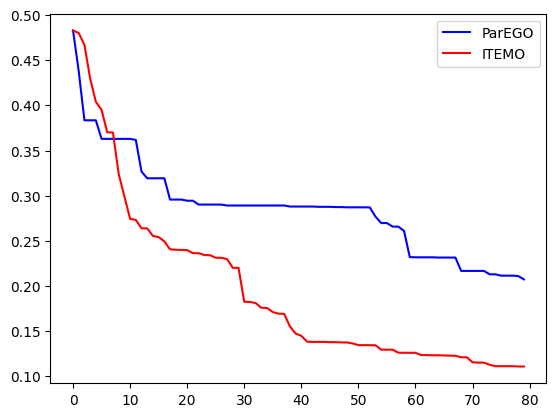

In [17]:
import matplotlib.pyplot as plt

plt.plot(np.array(Recorded_ParEGO_IGD), color = 'blue', label = 'ParEGO')
plt.plot(np.array(recorded_IGD), color = 'red', label = 'ITEMO')
plt.legend()
# plt.semilogy()
plt.show()